Assignment 2 (due on 11/8)

学生：郑各希 (12332312)

批改人：Zhao Shuhui

得分：42/50

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import warnings
%matplotlib inline
plt.rcParams['font.sans-serif']='Times New Roman'

=========================================
# 1 Significant Earthquakes
20/25  
1.1 计算每个国家从BC2150开始的地震死亡人数，并输出最多的10个国家，附上相应人数 5/5  
1.2 计算每年全世界震级大于6.0的地震数量，并画出时间序列，在报告中陈述是否有趋势以及理由——完成了筛选工作；时间序列绘画失误，注意数量为0的年份 8/10  
1.3 创建CountEq_LargestEq方法，要求方法返回 1）给定国家从BC2150开始的地震数量；2）该国家最严重地震的发生日期。对数据集中的所有国家使用该方法，将得到的结果按地震数量从大到小排序——因为将nan转为“9999”后震级的最大值变为了9999，使最严重地震的发生日期计算错误  7/10  
注意代码：更新版本的pandas将.append()方法改为了._append()方法

In [15]:
#第一大题
Sig_Eqs=pd.read_csv("earthquakes-2023-11-07_15-29-28_+0800.tsv",delimiter='\t')

In [3]:
Sig_Eqs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Search Parameters                   1 non-null      object 
 1   Id                                  6399 non-null   float64
 2   Year                                6399 non-null   float64
 3   Mo                                  5990 non-null   float64
 4   Dy                                  5834 non-null   float64
 5   Hr                                  4347 non-null   float64
 6   Mn                                  4138 non-null   float64
 7   Sec                                 4362 non-null   float64
 8   Tsu                                 1981 non-null   float64
 9   Vol                                 77 non-null     float64
 10  Country                             6398 non-null   object 
 11  Area                                331 non

## 1.1

In [4]:
#1.1
Country_deaths=Sig_Eqs.groupby(['Country'])['Deaths'].sum()
Top10_country=Country_deaths.sort_values(ascending=False).head(10)
print("The top10 countries along with the total number of deaths:")
print(Top10_country)

The top10 countries along with the total number of deaths:
Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64


## 1.2

Text(0, 0.5, 'Number of Earthquakes')

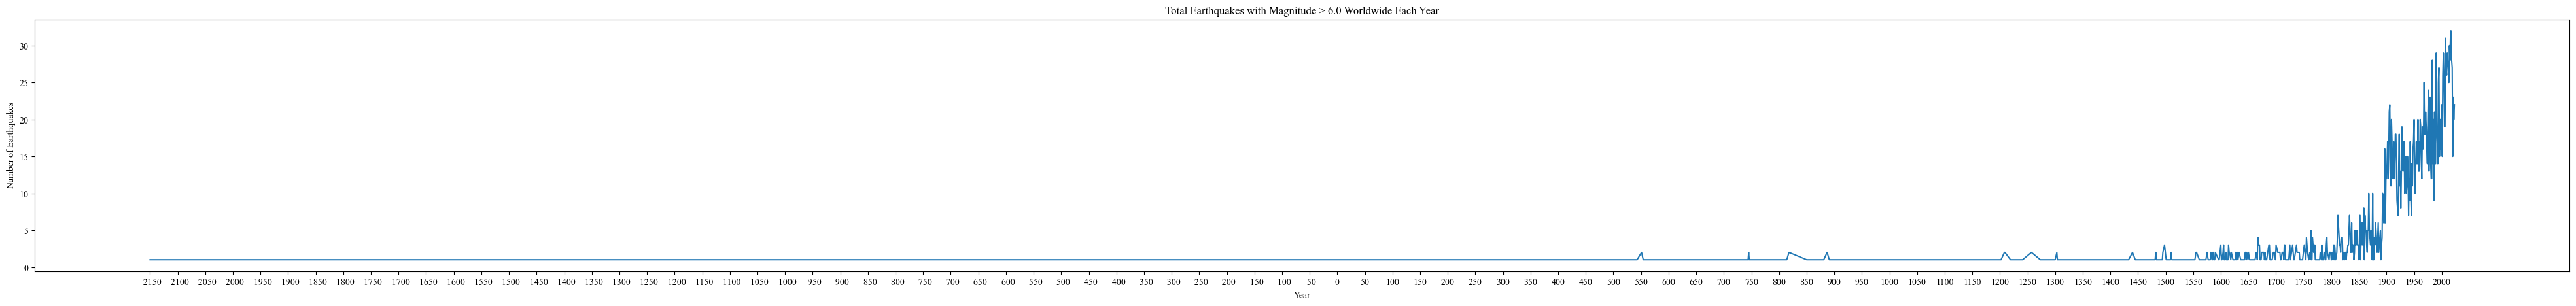

In [5]:
#1.2
Mag_larger_6=Sig_Eqs[Sig_Eqs['Mag']>6.0]
Mag_larger_6.groupby(['Year'])['Mag'].count().plot(figsize=(50, 5),xticks=np.arange(-2150,2023,50))
plt.title('Total Earthquakes with Magnitude > 6.0 Worldwide Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')

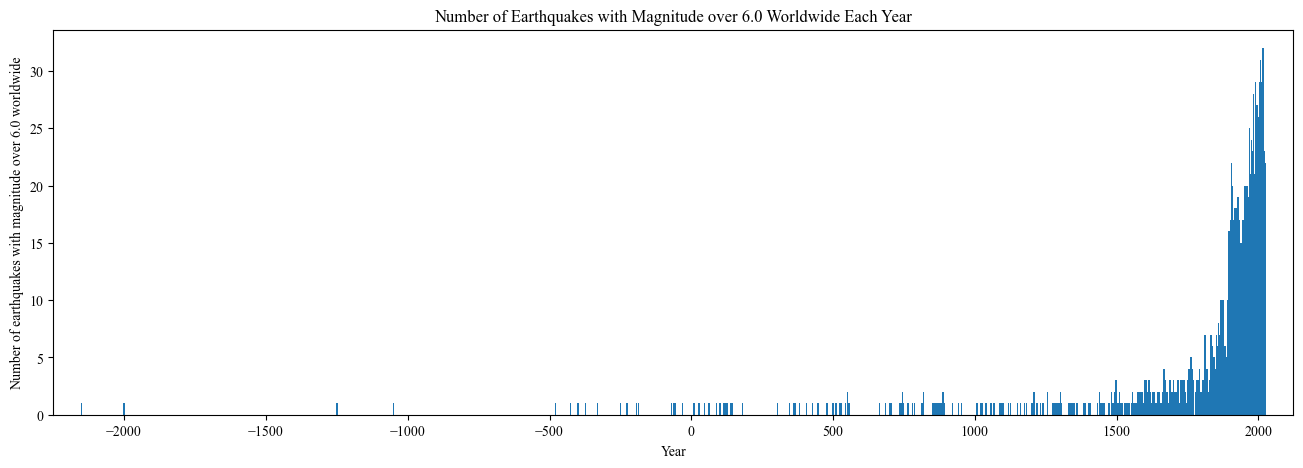

In [32]:
#1.2参考代码
#取Mag大于6的部分，根据年份进行分组，计算每组内有多少个数据
ysigeqs=Sig_Eqs[Sig_Eqs['Mag']>6].groupby(['Year'])['Mag'].count()
yearlist=ysigeqs.index
countlist=ysigeqs
# print(yearlist,countlist)

#设置图像大小，画柱状图，设置x轴范围和x/y坐标轴标签
plt.figure(figsize=(16,5))
plt.bar(yearlist,countlist,width=5)
plt.xlim(yearlist[0]-100,yearlist[-1]+100)
plt.xlabel('Year')
plt.ylabel('Number of earthquakes with magnitude over 6.0 worldwide')
plt.title('Number of Earthquakes with Magnitude over 6.0 Worldwide Each Year')
plt.show()

## 1.3

In [29]:
#1.3

Sig_Eqs.fillna(9999, inplace=True)#先把空值赋值成9999，否则会报错


def CountEq_LargestEq(country0):
    #获得地震次数统计
    counting=Sig_Eqs.groupby(['Country'])
    Country_eqs_count=counting['Mag'].count()[country0]
    country_data=Sig_Eqs[Sig_Eqs['Country']==country0]
    #获得年月日并组合到一起
    Year=country_data.loc[country_data['Mag'].astype("float64").idxmax()]['Year']
    Month=country_data.loc[country_data['Mag'].astype("float64").idxmax()]['Mo']
    Day=country_data.loc[country_data['Mag'].astype("float64").idxmax()]['Dy']
    Date_of_largest=str(int(Year))+"-"+str(int(Month))+"-"+str(int(Day))
    return Country_eqs_count,Date_of_largest

#提取国家名称，并把第一行nan剔除
countries=Sig_Eqs['Country'].unique()#learn pd.unique from CSDN
countries=np.delete(countries,0)
#创建report作为DataFrame
report=pd.DataFrame(columns=['Country','total number of eqs','Date of the largest eqs'])

for country in countries:
    eqs_count,lar_date=CountEq_LargestEq(country)
    #将9999替换成nan
    lar_date=lar_date.replace("9999","nan")
    need_report=pd.Series({'Country':country,'total number of eqs':eqs_count,'Date of the largest eqs':lar_date})
    # report=report.append(need_report,ignore_index=True) TA changed
    report=report._append(need_report,ignore_index=True) 

# TA added
print(Sig_Eqs[(Sig_Eqs['Country']=='CHINA')&(Sig_Eqs['Year']==1668)][['Id','Year','Mag']])
print(Sig_Eqs[(Sig_Eqs['Country']=='CHINA')&(Sig_Eqs['Year']==-47)][['Id','Year','Mag']])

report.sort_values(by='total number of eqs',ascending=False)



         Id    Year  Mag
982  1054.0  1668.0  8.5
      Id  Year   Mag
43  33.0 -47.0  9999


,Country,total number of eqs,Date of the largest eqs
14,CHINA,620,-47-4-17
33,JAPAN,414,1545-2-7
68,INDONESIA,411,1629-8-1
7,IRAN,384,662-4-26
9,TURKEY,335,-282-nan-nan
...,...,...,...
93,NORWAY,1,1819-8-31
126,CENTRAL AFRICAN REPUBLIC,1,1921-9-16
124,PALAU,1,1914-10-23
118,KIRIBATI,1,1905-6-30


=========================================
# 2 Windspeed
7/10  
以时间为x轴画出月平均风速，在报告中回答是否观察到某种趋势；同时在报告中说明你是如何筛选数据的——完成了对WND的分解和处理；没有筛选数据；获取的月平均风速是多年的月际风速变化，而题目要求呈现的是10年内连续的月平均风速变化


C:\Users\zsh\AppData\Local\Temp\ipykernel_24460\1659448854.py:2: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  Wind_data=pd.read_csv("2281305.csv")


Text(0.5, 1.0, 'Monthly Averaged Wind Speed')

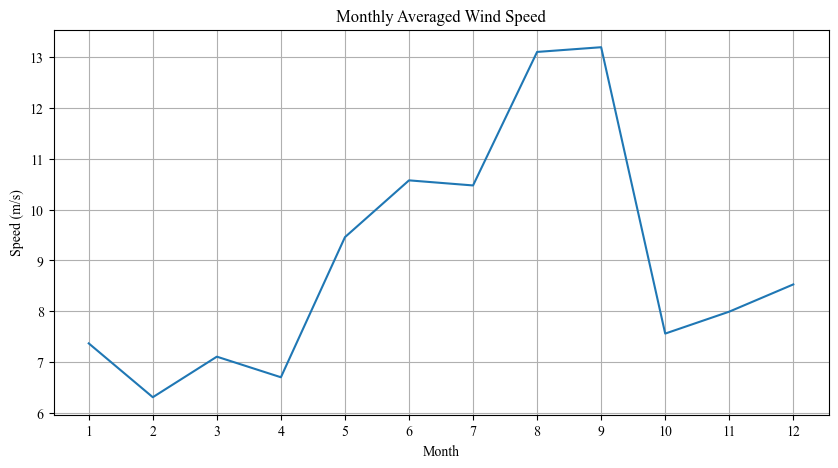

In [30]:
#第二题
Wind_data=pd.read_csv("2281305.csv")
Wind_speed_data=Wind_data['WND']
#创建Wspd_sta作为DateFrame
Wspd_sta=pd.DataFrame(columns=['Date','Speed'])
#将Wind_speed装换成array，以便后续快速计算
Wind_speed_data=np.array(Wind_speed_data)
data_items=Wind_speed_data.astype('str')
#运用分隔符逗号，将WND数据分隔开来
data_splits=np.char.split(data_items, ',')
#运用列表推导式快速读取所有风速信息，从CSDN学习到了列表推导式
extracted_data=[x[3] for x in data_splits]
#将风速数据改为整型,并除以比例尺10
extracted_data=[int(x)/10 for x in extracted_data]
Wspd_sta['Speed']=extracted_data
Wspd_sta['Date']=Wind_data['DATE']
Wspd_sta['Month']=pd.to_datetime(Wspd_sta['Date']).dt.month
Month_change=Wspd_sta.groupby(['Month'])['Speed'].mean().plot(figsize=(10, 5),fontsize=10,grid=True)
Month_change.set_ylabel('Speed (m/s)')
Month_change.set_xticks(np.arange(1,13))
Month_change.set_title('Monthly Averaged Wind Speed')

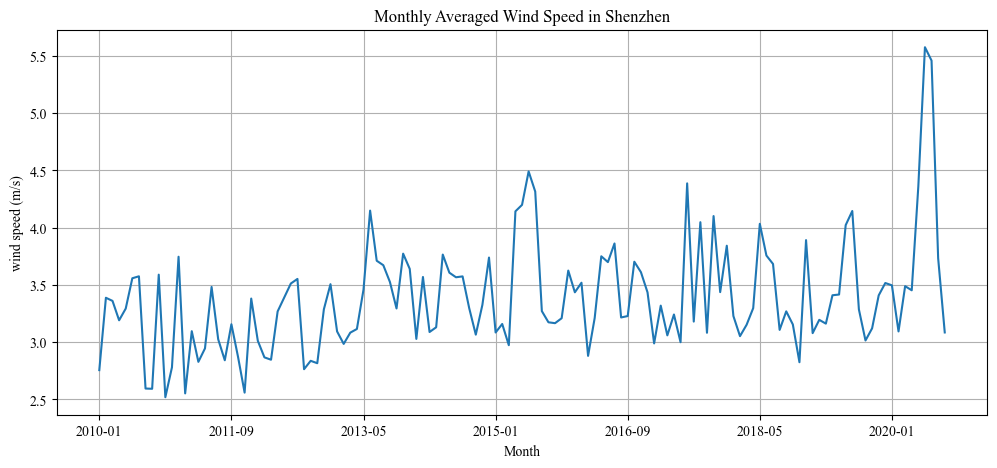

In [33]:
#参考代码
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#读取文件，查看文件信息
ws=pd.read_csv('2281305.csv',header=0,low_memory=False)
# print(ws.columns,ws.head(5))
#选取有效数据，进行数据处理，记得有scaling factor
ws=ws[['DATE','WND']]
ws[['direction_angle','direction_quality','type','speed','speed_quality']]=ws['WND'].str.split(',',expand=True)
ws['speed']=ws['speed'].astype(float)/10
ws[['yyyy','mm','ddHHMMSS']]=ws['DATE'].str.split('-',expand=True)
ws['yyyymm']=ws['yyyy'].astype(str)+'-'+ws['mm'].astype(str)
# print(ws.speed.max())
#根据user guide进行质量控制
#bad quality1: type==9
ws=ws[ws['type']!='9']
#bad quality2: windspeed>90 or windspeed<0
ws=ws[(ws['speed']>=0) & (ws['speed']<=90)]
#bad quality3: speed_quality=2,3,6,7
ws=ws[ws['speed_quality'].isin(['0','1','4','5','9'])]
#根据年月分组对风速取平均，并绘制时间序列
wsg=ws.groupby('yyyymm')['speed'].mean()
plt.figure(figsize=(12,5))
wsg.plot(xlabel='Month',ylabel='wind speed (m/s)',title='Monthly Averaged Wind Speed in Shenzhen',grid=True)
plt.show()

=========================================
# 3 Free Exploration
15/15  
3.1 读取csv/xls/xlsx文件，并清理缺失/低质量数据 5/5  
3.2 画出某个变量的时间序列 5/5  
3.3 对该变量进行至少5种简单的统计检验，并在报告中汇报你的发现 5/5


Text(0, 0.5, 'TDS')

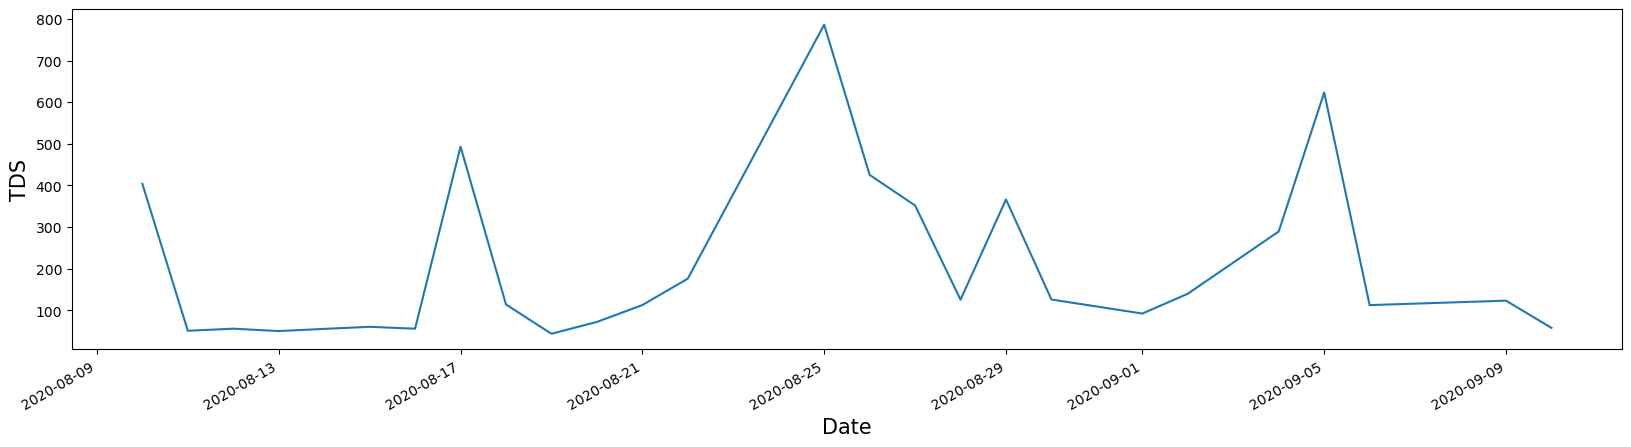

In [4]:
#第三大题
#3.1
Data_YZ=pd.read_excel("2020夏季雅江全流域.xlsx")
Data_YZ=Data_YZ.dropna(subset=['水温','类型']) #清除没有水温和类型的数据点
#3.2 日期和TDS
Date_TDS=Data_YZ.groupby(['日期'])['TDS'].mean().plot(figsize=(20, 5),fontsize=10)
Date_TDS.set_xlabel('Date',fontsize=15)
Date_TDS.set_ylabel('TDS',fontsize=15)

Text(0, 0.5, 'TDS')

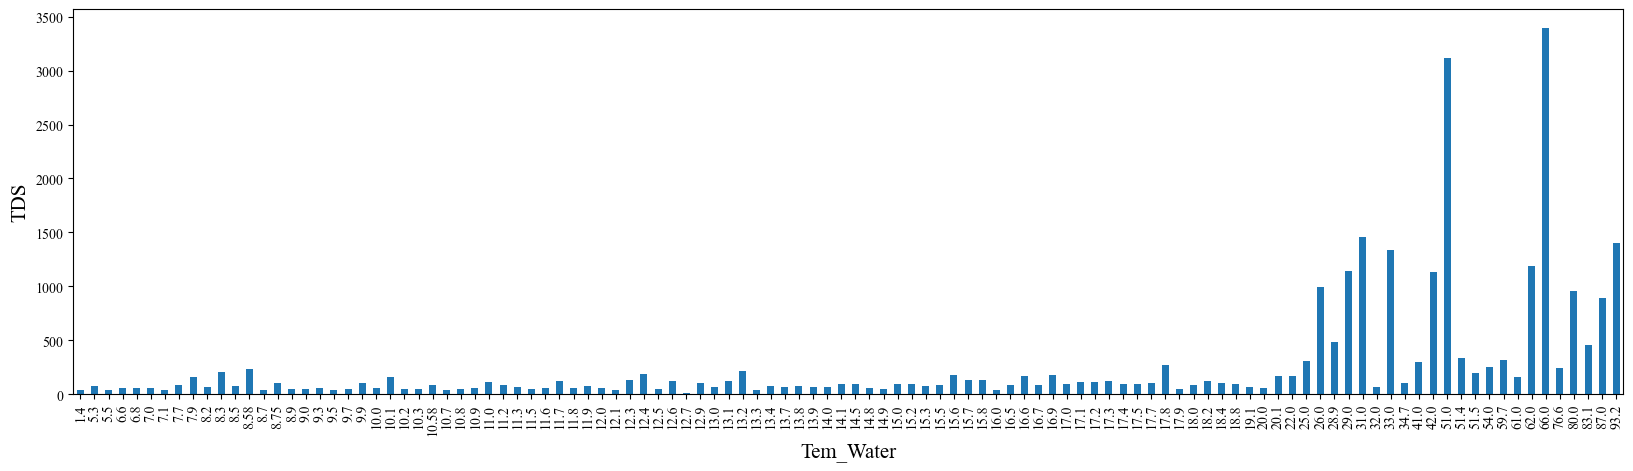

In [43]:
#3.3    5组统计
Tem_TDS=Data_YZ.groupby(['水温'])['TDS'].mean().plot(figsize=(20, 5),fontsize=10,kind='bar')
Tem_TDS.set_xlabel('Tem_Water',fontsize=15)
Tem_TDS.set_ylabel('TDS',fontsize=15)

Text(0, 0.5, 'pH')

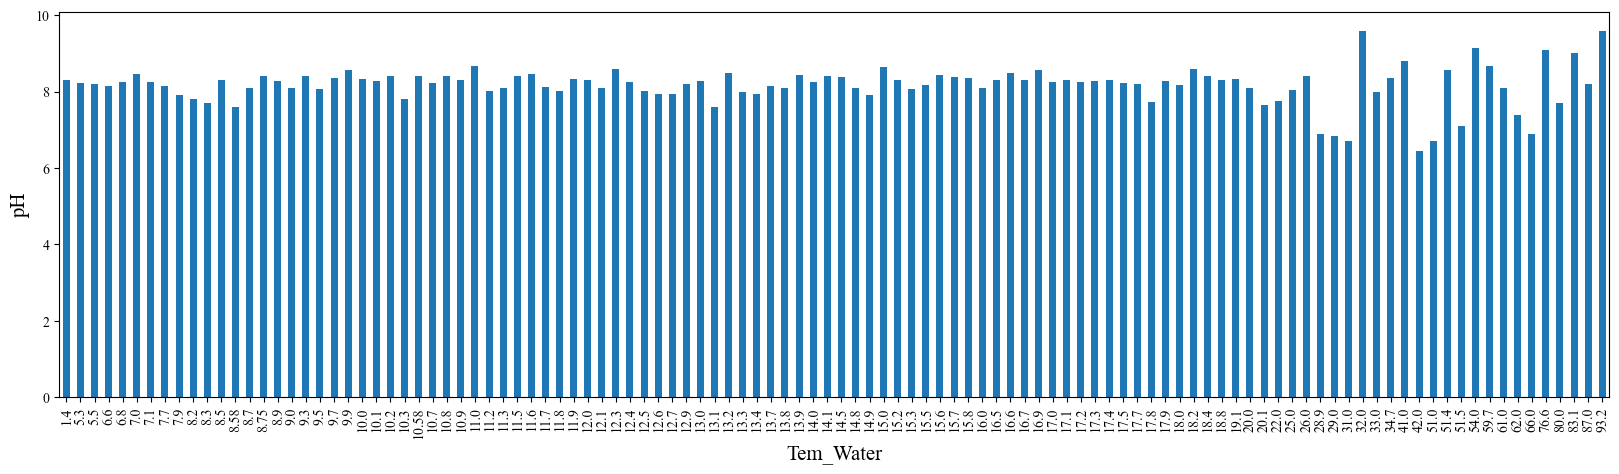

In [44]:
Tem_pH=Data_YZ.groupby(['水温'])['pH'].mean().plot(figsize=(20, 5),fontsize=10,kind='bar')
Tem_pH.set_xlabel('Tem_Water',fontsize=15)
Tem_pH.set_ylabel('pH',fontsize=15)

Text(0, 0.5, 'TDS')

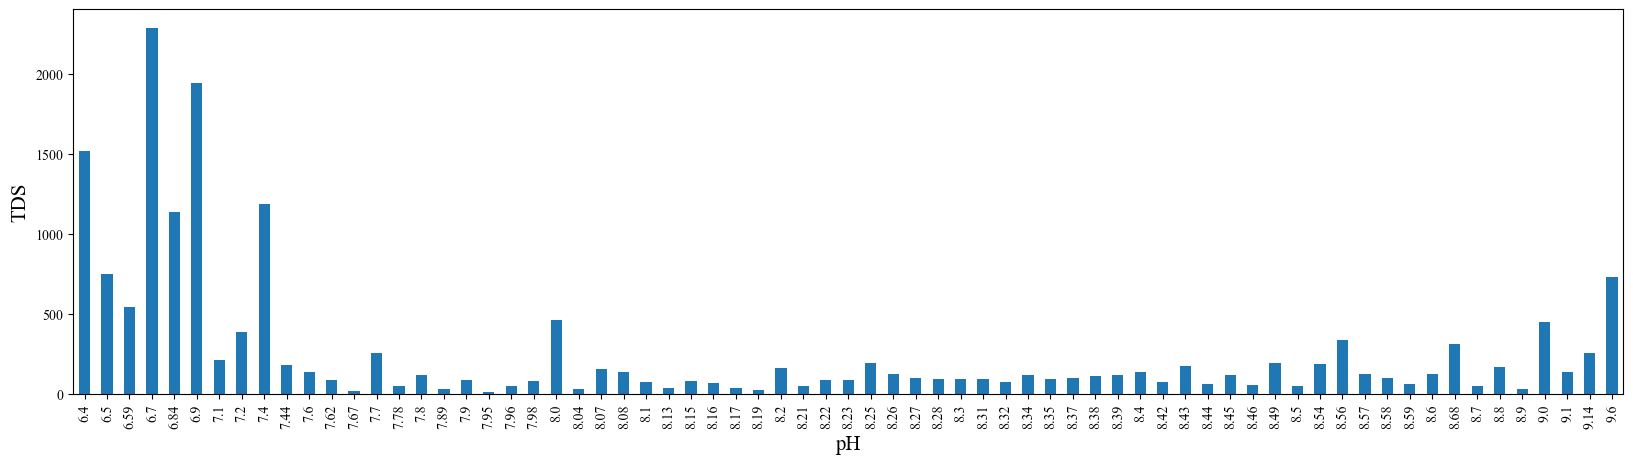

In [49]:
pH_TDS=Data_YZ.groupby(['pH'])['TDS'].mean().plot(figsize=(20, 5),fontsize=10,kind='bar')
pH_TDS.set_xlabel('pH',fontsize=15)
pH_TDS.set_ylabel('TDS',fontsize=15)

Text(0, 0.5, 'alkalinity-0.16')

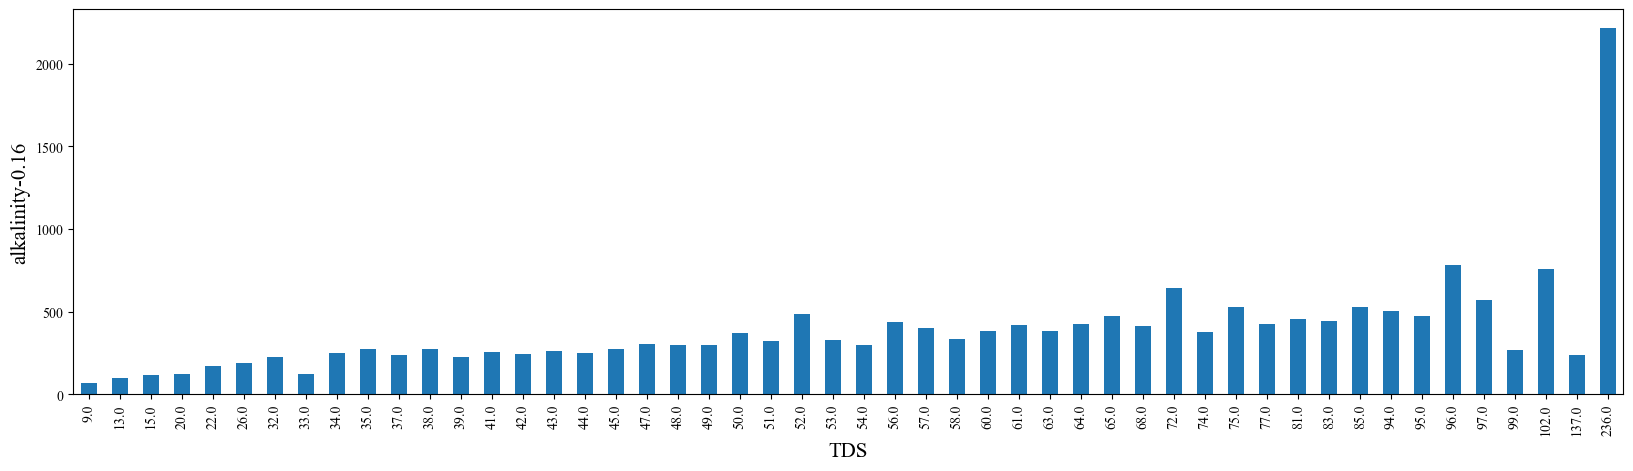

In [78]:
Alt_pH=Data_YZ.groupby(['TDS'])['碱度0.16'].mean().plot(figsize=(20, 5),fontsize=10,kind='bar')
Alt_pH.set_xlabel('TDS',fontsize=15)
Alt_pH.set_ylabel('alkalinity-0.16',fontsize=15)

Text(0, 0.5, 'alkalinity-0.16')

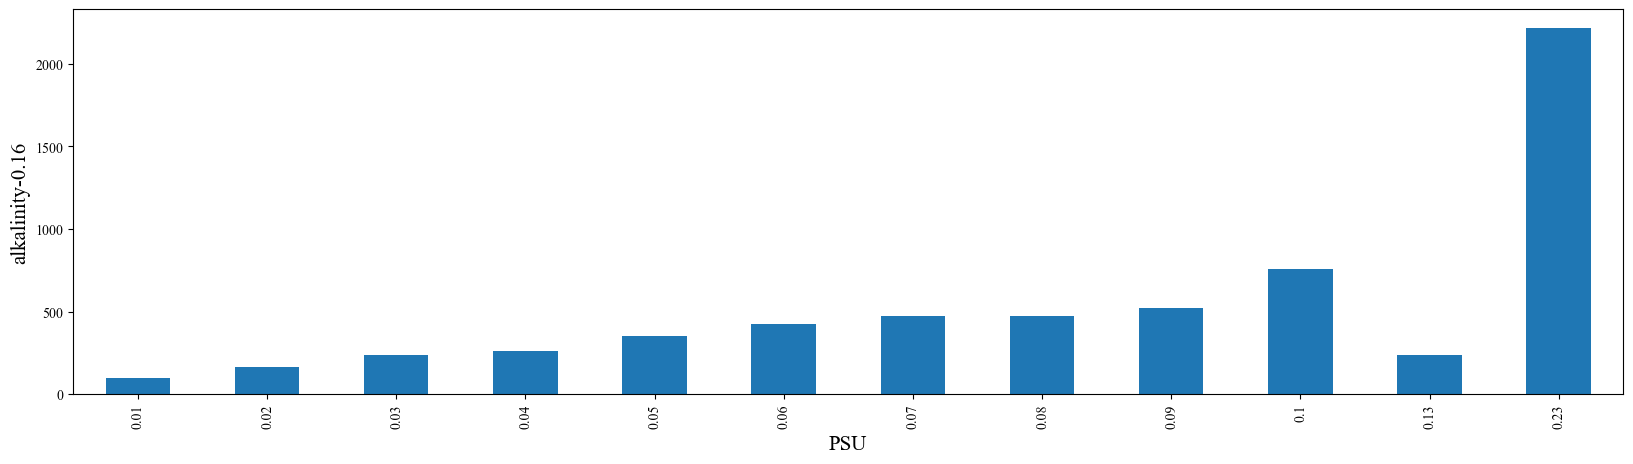

In [79]:
PSU_alkalinity=Data_YZ.groupby(['PSU'])['碱度0.16'].mean().plot(figsize=(20, 5),fontsize=10,kind='bar')
PSU_alkalinity.set_xlabel('PSU',fontsize=15)
PSU_alkalinity.set_ylabel('alkalinity-0.16',fontsize=15)